In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

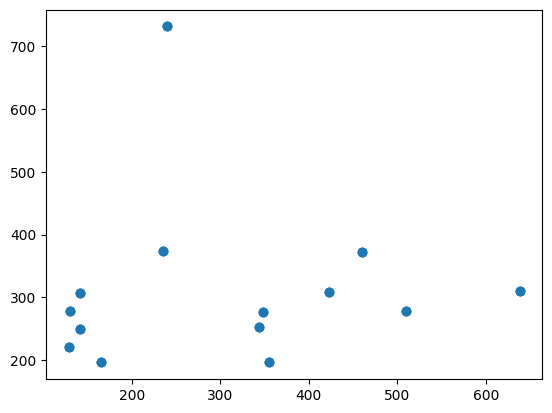

In [6]:
df = pd.DataFrame()
with open('dummy.json') as f:
    data = json.load(f)

data = data[0]
for entry in data:
    df = pd.concat([df,pd.DataFrame(entry)], ignore_index=True)


df = df[["x","y","lines"]]

#Get Important Data
x = df['x']
y = df['y']
context = df['lines']

#Plot the data
plt.scatter(x, y)
plt.show()

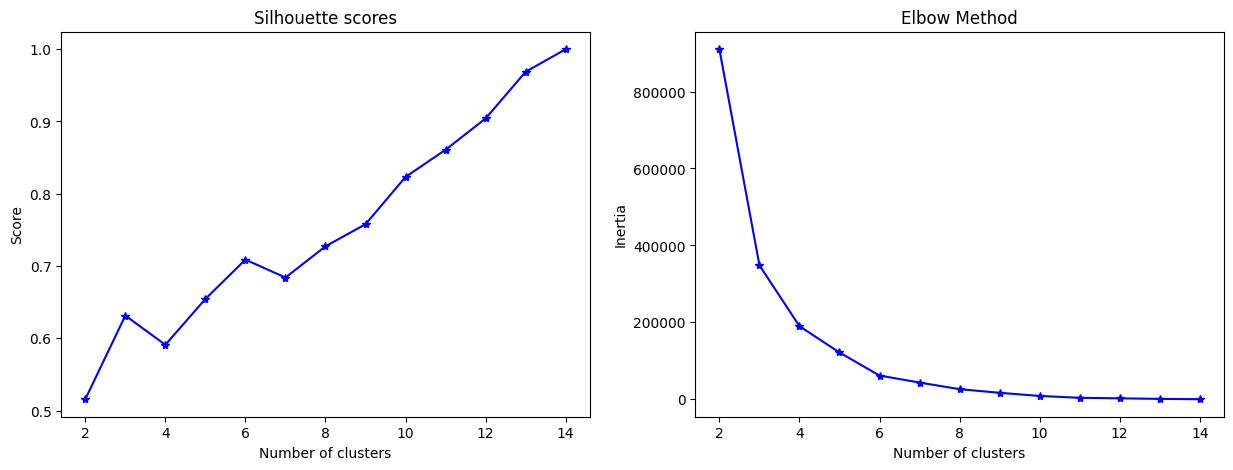

In [7]:
# Determine the optimal number of clusters
data = np.array([x,y]).T
scores = [] 
inertias = [] 
values = np.arange(2,15)

for num_clusters in values:
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_, metric='euclidean')
    scores.append(score)
    inertias.append(kmeans.inertia_)

# Plotting silhouette scores
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(values, scores, 'b*-')
plt.title('Silhouette scores')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

# Plotting the elbow method
plt.subplot(122)
plt.plot(values, inertias, 'b*-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.show()

c:\Users\Aziza\Desktop\Neopolis Dev\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


['forme_juridique ', 'forme_juridique ', 'forme_juridique ', 'raison_sociale', 'raison_sociale', 'raison_sociale', 'adresse', 'adresse', 'adresse', 'tel', 'tel', 'tel', 'code_postal', 'code_postal', 'code_postal', 'commune', 'commune', 'commune', 'telecopie', 'telecopie', 'telecopie', 'email', 'email', 'email', 'num_siret', 'num_siret', 'num_siret', 'code_naf ', 'code_naf ', 'code_naf ', 'date_creation', 'date_creation', 'date_creation', 'echeance_principale ', 'echeance_principale ', 'echeance_principale ', 'effet_garantie', 'effet_garantie', 'effet_garantie']
['Veuillez identifier ce champ de texte', 'Veuillez identifier ce champ de texte', 'Veuillez identifier ce champ de texte']


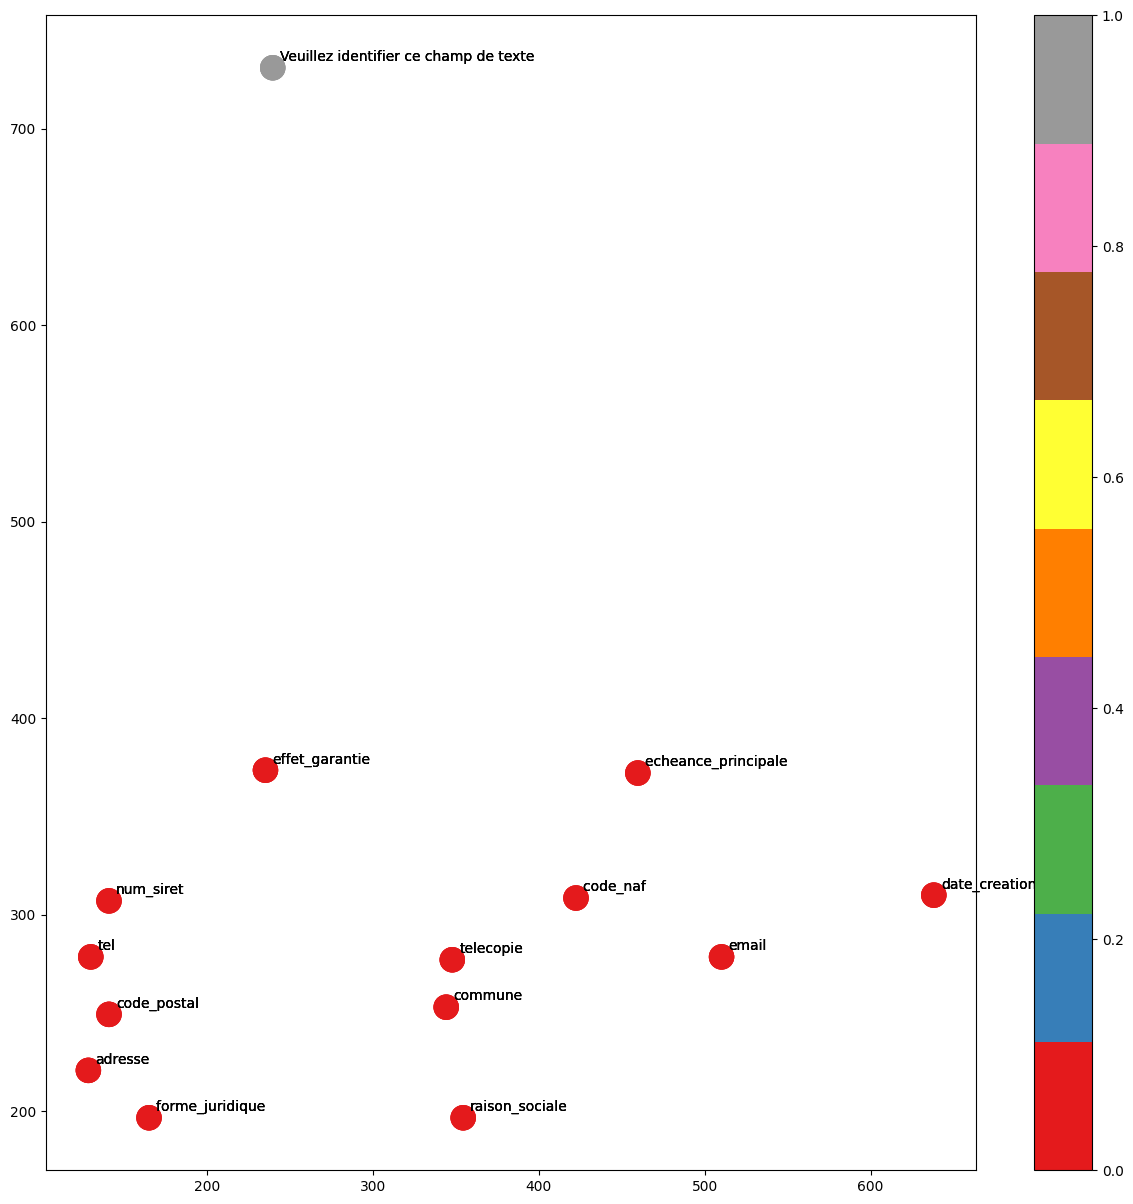

In [9]:
X = np.array(list(zip(x,y)))
Y = df['y'].values.reshape(-1, 1)

kmeans = KMeans(n_clusters=2)
kmeans.fit(Y)
y_kmeans = kmeans.predict(Y)

cluster = {}

for key in y_kmeans:
    if key not in cluster:
        cluster[key]=[]
        
for key,word in list(zip(y_kmeans,context)):
    cluster[key].append(word)
    
for key in cluster:
    print(cluster[key])
    

# Create the scatter plot
plt.figure(figsize=(15, 15))
scatter = plt.scatter(x, y, c=y_kmeans, s=300, cmap='Set1')

# Annotate the plot with df["lines"] values
for i, txt in enumerate(df["lines"]):
    plt.annotate(txt, (x[i], y[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)

plt.colorbar(scatter)
plt.show()

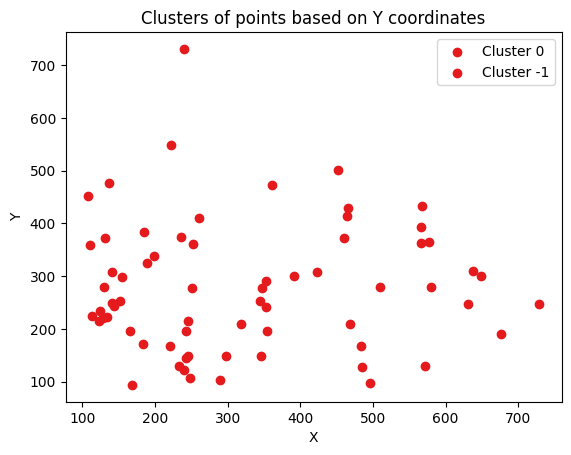

In [13]:
# Reshape Y coordinates to fit the DBSCAN input format
Y = df['y'].values.reshape(-1, 1)

# Compute DBSCAN
db = DBSCAN(eps=np.ptp(Y)*0.05, min_samples=2).fit(Y)

# Create a new column in df for the cluster labels
df['cluster'] = db.labels_


# Create a color palette
palette = plt.get_cmap('Set1')

fig, ax = plt.subplots()

# For each cluster label
for label in df['cluster'].unique():
    # Plot the points in this cluster
    df_cluster = df[df['cluster'] == label]
    ax.scatter(df_cluster['x'], df_cluster['y'], color=palette(label), label=f'Cluster {label}')

ax.set_title('Clusters of points based on Y coordinates')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

plt.show()